# Analise Exploratora PayBy
by Luciano Carvalho

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import pytz

In [9]:
engine = create_engine('postgresql://postgres:@LucianoNeto10@localhost:5432/payby_prod')

In [53]:
DB_NAME = "payby_prod"
DB_HOST = "localhost"
DB_PASSWORD = "%40LucianoNeto10"
DB_PORT = 5432
DB_USER = "postgres"

# Create the engine
engine = create_engine(f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}')

# Use read_sql_table to load the data from the table into a DataFrame
df_charges = pd.read_sql_table("pagarme_pagarme_charge", engine)
df_card = pd.read_sql_table("pagarme_pagarme_card", engine)
df_customer = pd.read_sql_table("pagarme_pagarme_customer", engine)
df_operation = pd.read_sql_table("pagarme_pagarme_operation", engine)
df_pix_payer = pd.read_sql_table("pagarme_pagarme_pix_payer", engine)
df_recipient = pd.read_sql_table("pagarme_pagarme_recipient", engine)
df_pagarme_store = pd.read_sql_table("pagarme_pagarme_store", engine)
df_payment = pd.read_sql_table("core_payment", engine)
df_ticket = pd.read_sql_table("core_ticket", engine)
df_store = pd.read_sql_table("core_store", engine)

In [47]:
target_timezone = pytz.timezone('America/Sao_Paulo')

# Convert to target timezone
df_payment['ts_created'] = df_payment['ts_created'].dt.tz_convert(target_timezone)
df_payment.head()

,id,ts_created,ts_confirmed,ts_fail,ts_notified,type,success_token,fail_token,pdv_reference_id,payment_total,payment_with_tip,tip,ticket_id,pix_code,pix_code_url,ts_refunded,order_id,payment_final_value,payment_hour
9069,10216,2024-04-08 21:52:53.983960-03:00,NaT,NaT,NaT,t,6d47aeb4-bbe4-4a67-ac84-7c008e17d212,eff0a734-14ec-4aa2-ad65-b0654d9706c3,None,205549,205549,0.0,10216,None,None,NaT,None,NaN,21
12609,11727,2024-04-22 09:04:11.006556-03:00,NaT,NaT,NaT,t,bee1a446-0ac4-44fd-aa60-aa6f921c67e4,8eaa9872-9b42-4ba0-a7ad-28356d9790b6,None,204754,204754,0.0,11727,None,None,NaT,None,NaN,9
12630,11728,2024-04-22 10:03:30.065177-03:00,NaT,NaT,NaT,t,3b18ede3-eef4-4822-b87a-15489d2548d8,448c2c40-915a-4ced-8f55-ad8c6c73218c,None,204754,204754,0.0,11728,None,None,NaT,None,NaN,10
12282,11714,2024-04-21 21:13:00.510107-03:00,2024-04-22 00:14:32.610024+00:00,NaT,NaT,t,b4b4d627-6c2d-481b-921a-e809f6eaccad,eff428a3-9471-4120-88bf-59979ebe5031,None,204314,204314,0.0,11714,None,None,2024-06-01 23:43:00+00:00,None,NaN,21
13018,18011,2024-06-20 16:45:45.631075-03:00,NaT,NaT,NaT,t,9d321a2d-81c0-43f5-ad4e-5af6be1c2f1e,4b058205-7a9f-4648-8ca7-05ec31e49f59,None,176935,176935,0.0,18011,00020101021226820014br.gov.bcb.pix2560pix.ston...,https://api.pagar.me/core/v5/transactions/tran...,NaT,or_EA5LE0KcZUNmGrZO,176935.0,16


In [48]:
df_payment.sort_values('payment_total', axis=0, ascending=False, inplace=True)
df_payment_hour = df_payment
df_payment_hour['payment_hour'] = df_payment_hour['ts_created'].dt.hour
df_payment_hour.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19638 entries, 9069 to 10788
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype                            
---  ------               --------------  -----                            
 0   id                   19638 non-null  int64                            
 1   ts_created           19638 non-null  datetime64[ns, America/Sao_Paulo]
 2   ts_confirmed         8617 non-null   datetime64[ns, UTC]              
 3   ts_fail              397 non-null    datetime64[ns, UTC]              
 4   ts_notified          13620 non-null  datetime64[ns, UTC]              
 5   type                 19638 non-null  object                           
 6   success_token        19638 non-null  object                           
 7   fail_token           19638 non-null  object                           
 8   pdv_reference_id     10731 non-null  object                           
 9   payment_total        19638 non-null  int64          

In [49]:
grouped = df_payment_hour.groupby('payment_hour').size().reset_index(name='transaction_count')

# Rename the columns for clarity
grouped.columns = ['hour', 'total_amount']
grouped.head()

,hour,total_amount
0,0,37
1,1,16
2,2,5
3,3,12
4,4,6


Text(0.5, 1.0, 'Vendas x Horario na PayBy')

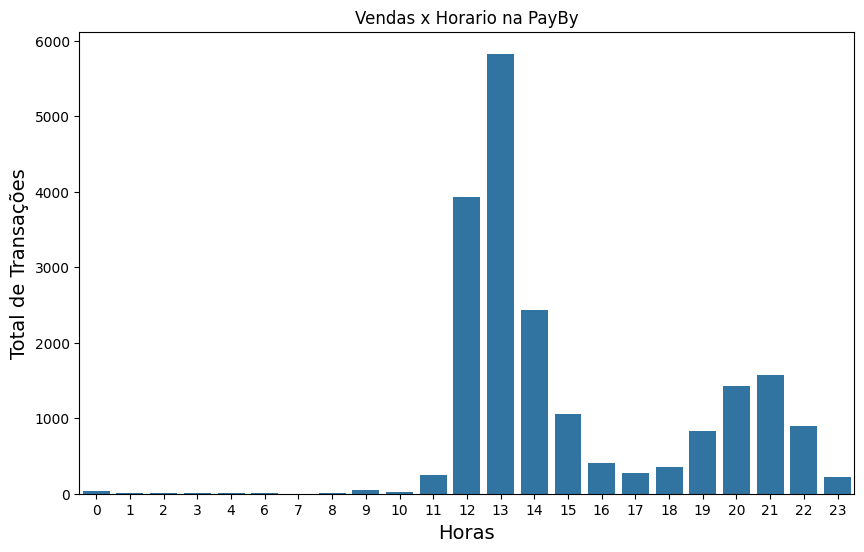

In [51]:
fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.barplot(data=grouped, x='hour', y='total_amount')
ax.set_xlabel('Horas', fontsize = 14)
ax.set_ylabel('Total de Transações', fontsize = 14)
ax.set_title('Vendas x Horario na PayBy')

In [71]:
df_payment_ticket = pd.merge(df_payment ,df_ticket, on='id', how='left')
df_payment_ticket.columns
store_transaction = df_payment_ticket.groupby('store_id').size().reset_index(name='Number of Transactions')
store_transaction.head()

,store_id,Number of Transactions
0,1,354
1,6,2409
2,7,13
3,8,6
4,10,3586


In [81]:
best_stores = pd.merge(store_transaction, df_store, left_on='store_id', right_on='id')
best_stores = best_stores[['name', 'Number of Transactions']]
best_stores = best_stores.loc[~best_stores['name'].isin(['payby', 'Menew Sandbox', 'Menew'])]

best_stores.head()

,name,Number of Transactions
1,ses,2409
4,Shopping da Cidade,3586
5,Salvador Shopping,2221
6,Shopping Paseo Comanda,584
7,Terraço Tancredo,219


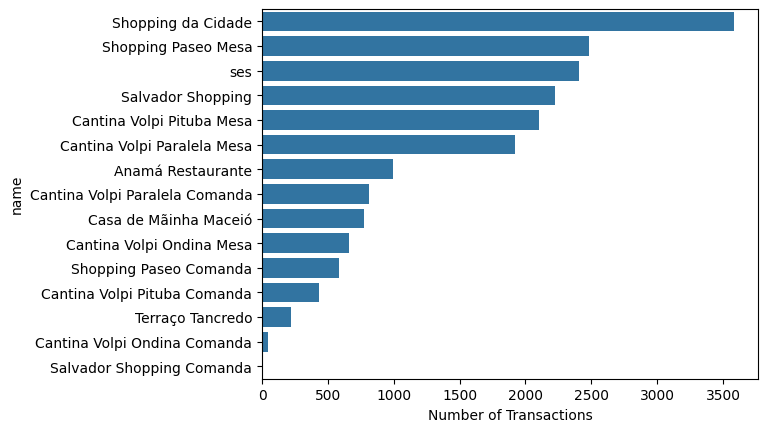

In [84]:
ax = sns.barplot(data=best_stores.sort_values('Number of Transactions', ascending=False), x='Number of Transactions', y='name', orient='h')

([<matplotlib.patches.Wedge at 0x30d7540a0>,
 [Text(0.7009833772195326, 0.8477159340615809, 'Shopping da Cidade'),
  Text(-0.7878661890996196, 0.7676371982086607, 'Shopping Paseo Mesa'),
  Text(-1.0007073154881525, -0.4567109246870449, 'ses'),
  Text(-0.007287221486197029, -1.0999758617365252, 'Salvador Shopping'),
  Text(0.9566505038774813, -0.5429731240411089, 'Cantina Volpi Pituba Mesa')])

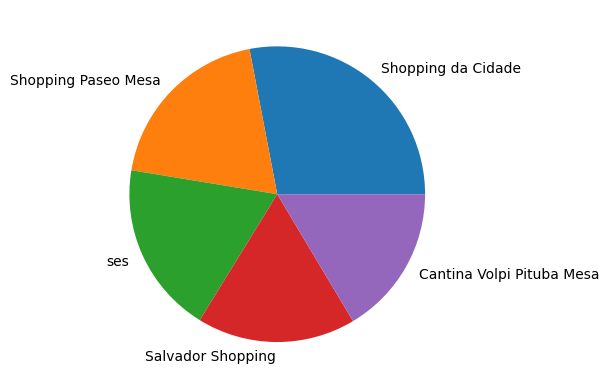

In [96]:
sort = best_stores.sort_values('Number of Transactions', ascending=False)
plt.pie(sort.head()['Number of Transactions'], labels=sort.head()['name'])

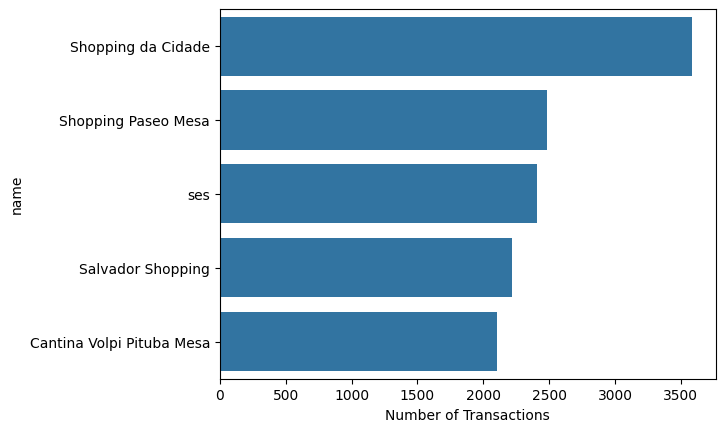

In [98]:
ax = sns.barplot(data=sort.head(), x='Number of Transactions', y='name')